# German Traffic Sign Recognition Dataset

## Loading the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib.image import imread

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
traffic_dataset = ('/content/drive/MyDrive/German Traffic Sign/Meta')
train_path = ('/content/drive/MyDrive/German Traffic Sign/Train')
test_path = ('/content/drive/MyDrive/German Traffic Sign/Test')

## Understanding the Data

In [ ]:
train_imgs = 0
for image_dir in os.listdir(train_path):
    image_dir_path = train_path+'/'+image_dir
    train_imgs+=len(os.listdir(image_dir_path))

num_categories = len(os.listdir(train_path))
num_test_data = len(os.listdir(test_path))


print(f"Total no. of categories: {num_categories}\nNo. of total images: {num_test_data+train_imgs}\nTotal no. of images in training dir: {train_imgs}\nTotal no. of images in testing dir: {num_test_data}")

Total no. of categories: 43
No. of total images: 52851
Total no. of images in training dir: 40140
Total no. of image in testing dir: 12711


### Classifying the Images


In [ ]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing for trucks in excess of 3.5 tons authorized weight',
            11:'Right of way',
            12:'Priority road',
            13:'Yield right of way',
            14:'Stop',
            15:'Prohibited for all vehicles',
            16:'Tractor and trucks with an authorized loaded weight of more than 3.5 tons prohibited',
            17:'Entry prohibited',
            18:'Danger',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Rough road',
            23:'Slippery road',
            24:'Road narrows',
            25:'Construction site',
            26:'Signals lights ahead',
            27:'Pedestrians crosswalk ahead',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End of restrictions',
            33:'Mandatory direction of travel(right)',
            34:'Mandatory direction of travel(left)',
            35:'AMandatory direction of travel(ahead)',
            36:'Mandatory direction of travel(ahead or right)',
            37:'Mandatory direction of travel(ahead or left)',
            38:'Keep right',
            39:'Keep left',
            40:'Traffic circle',
            41:'End of passing zone',
            42:'End of passing zone of more than 3.5 tons'
            }

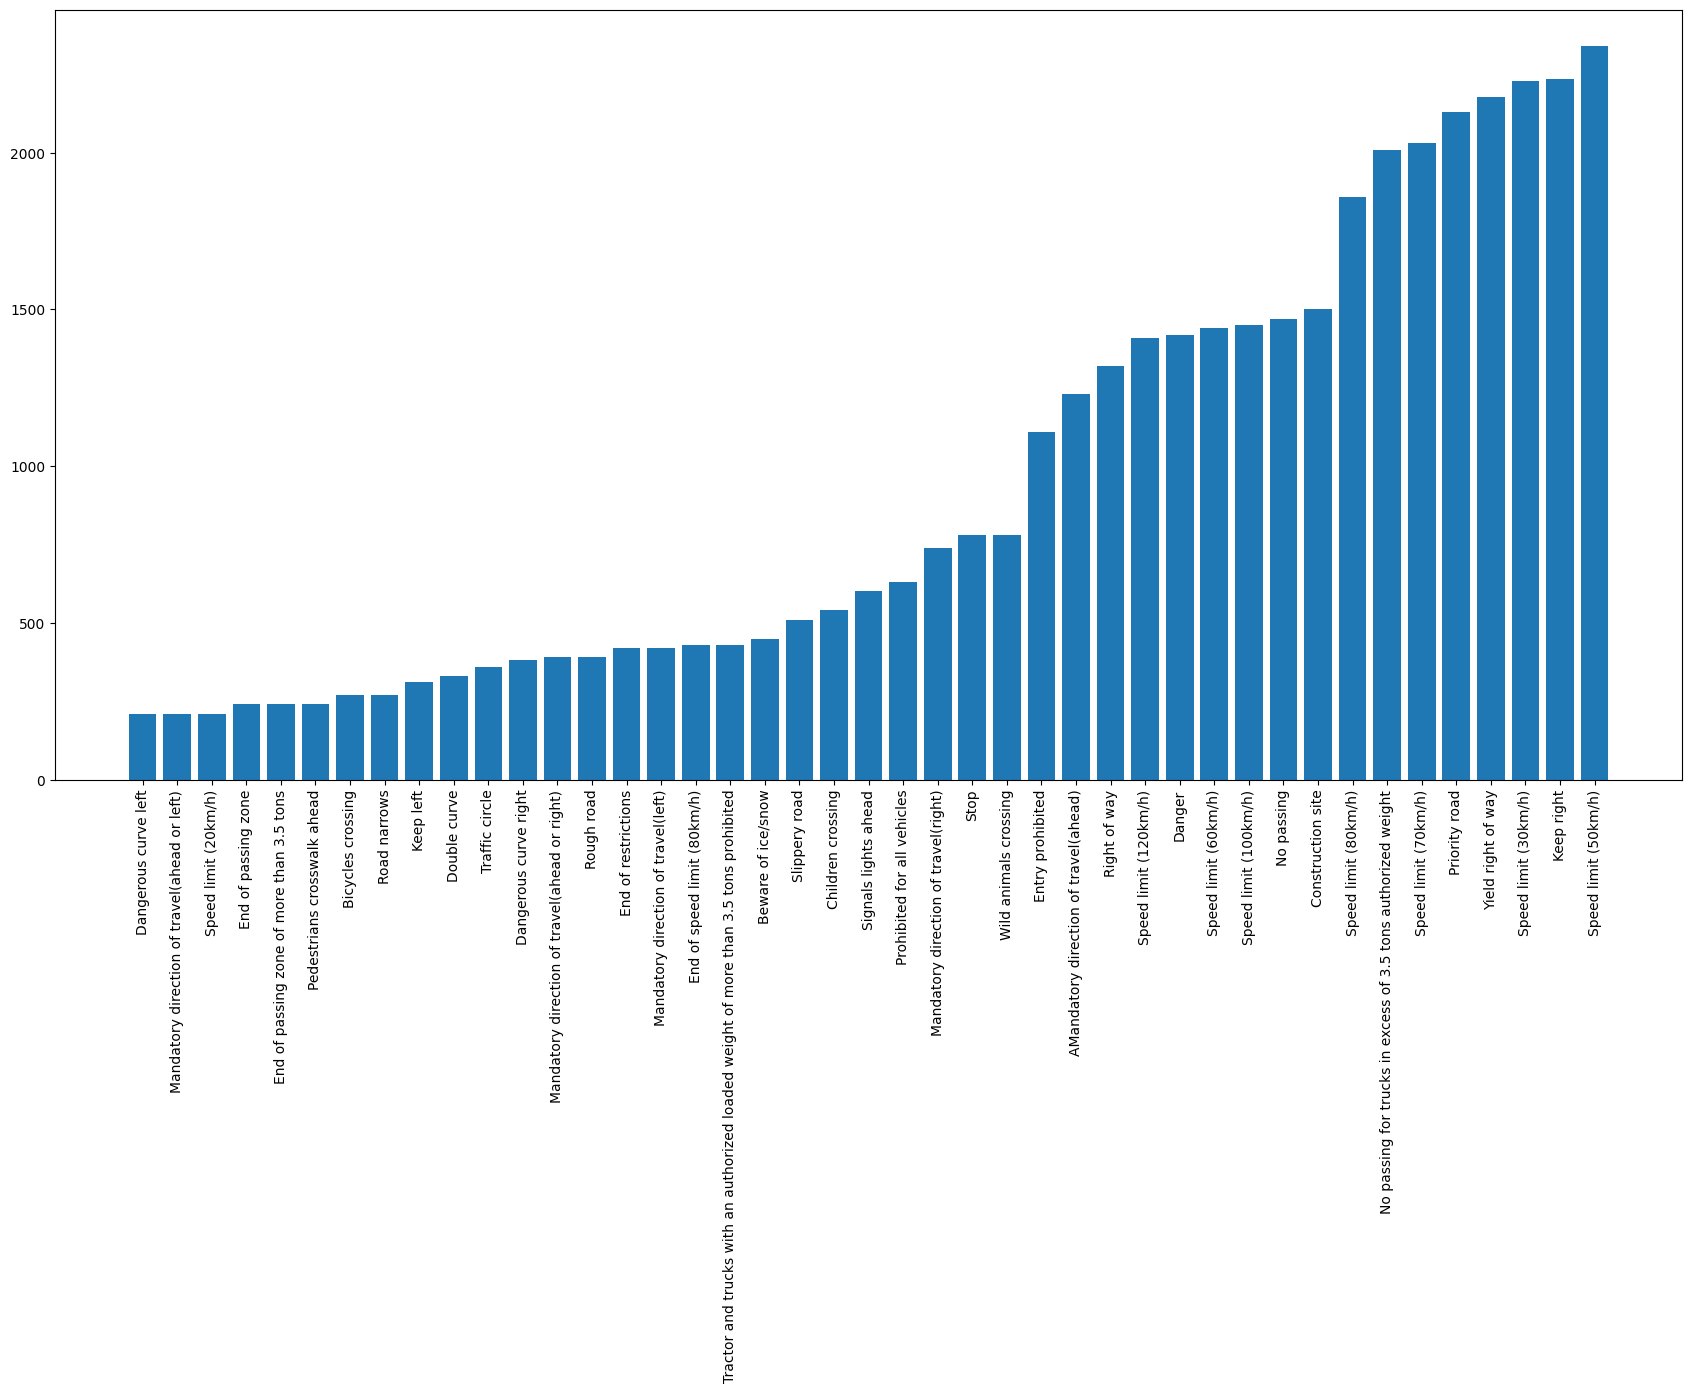

In [ ]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])

# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

### Understanding the test data

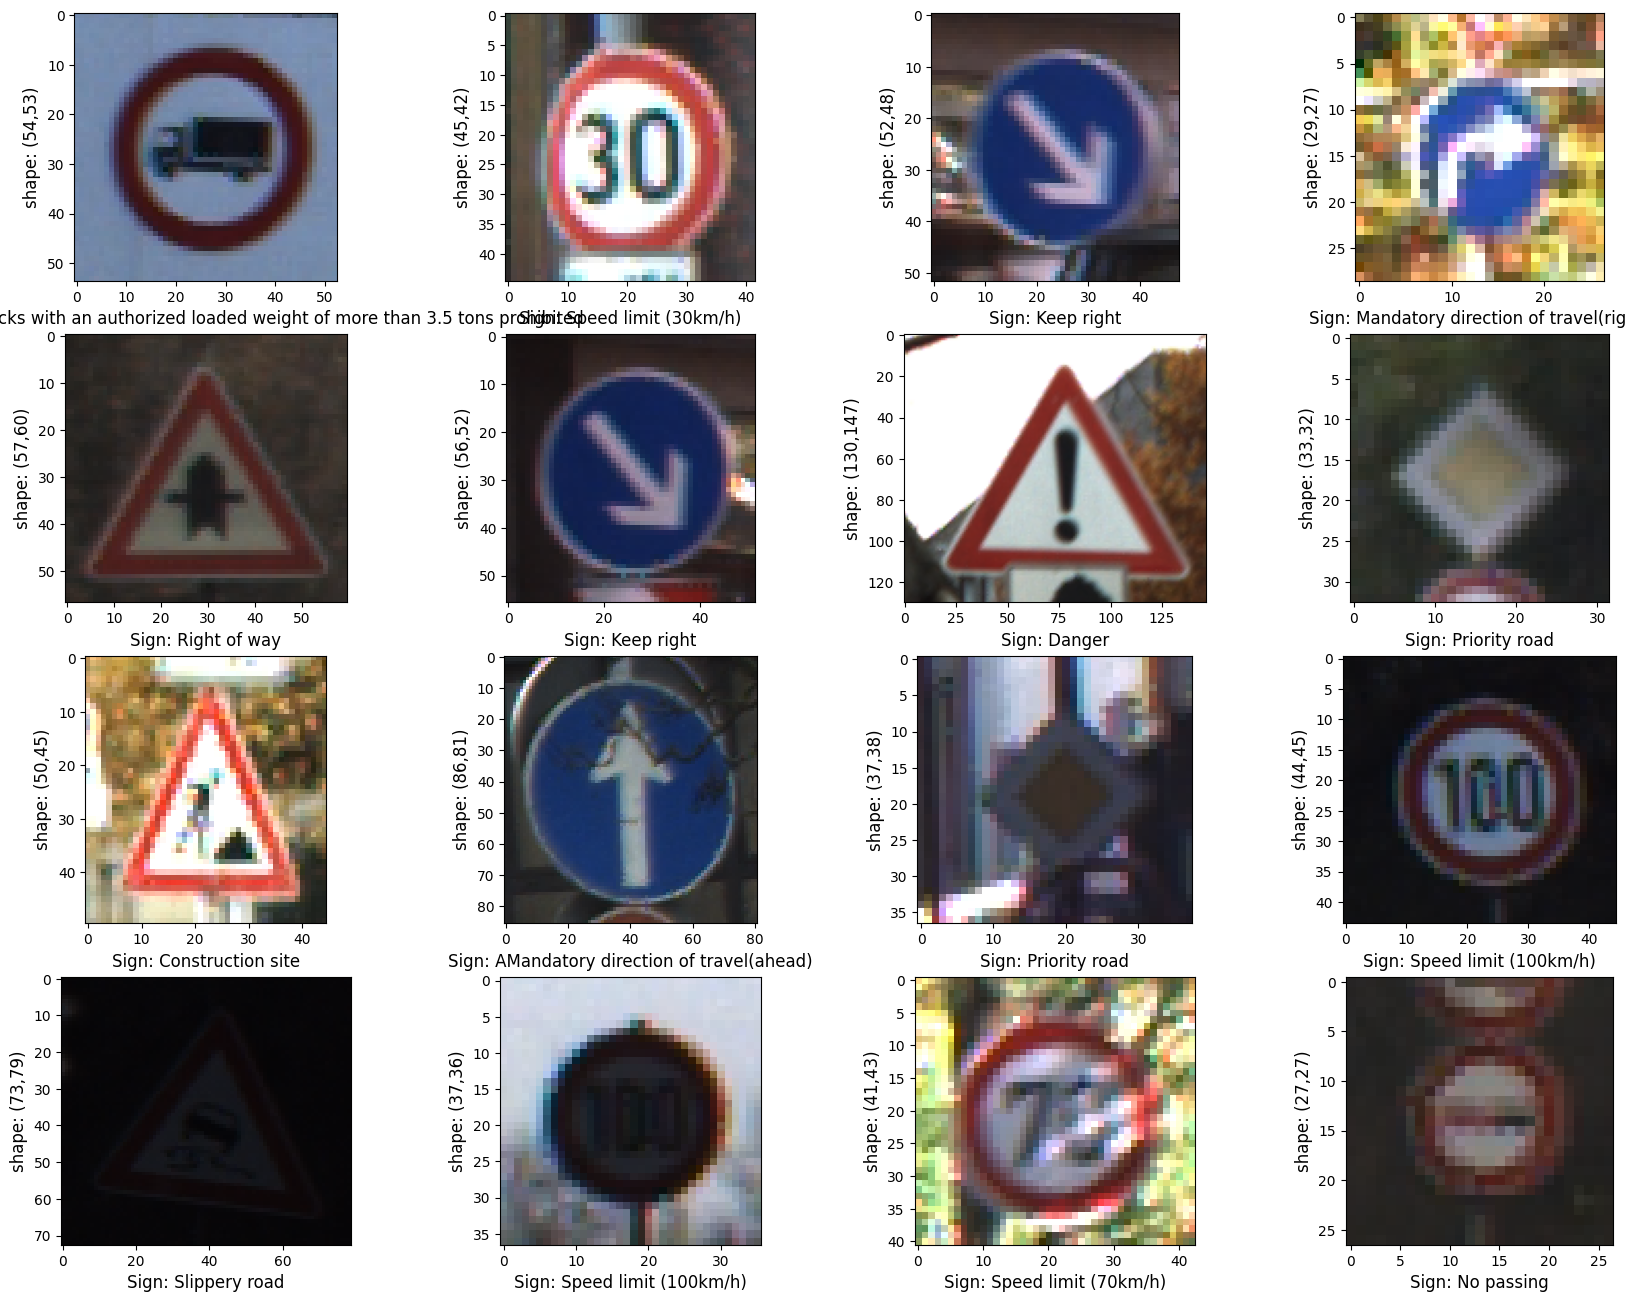

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/German Traffic Sign/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(21,16))
traffic_dataset = '/content/drive/MyDrive/German Traffic Sign'

for i in range(0,16):
    plt.subplot(4,4,i+1)
    img_path = f"{traffic_dataset}/{imgs[i]}"
    img_class = classes[test.loc[test['Path']==imgs[i],'ClassId'].iloc[0]]
    img = imread(img_path)
    plt.imshow(img)
    plt.xlabel(f"Sign: {img_class}", fontsize = 12)
    plt.ylabel(f"shape: ({img.shape[0]},{img.shape[1]})", fontsize = 12)

In [ ]:
import cv2
from PIL import Image

resize_h,resize_w = 30,30

image_data = []
image_labels = []

for i in range(8):
    path = train_path + '/' + str(i)
    images = os.listdir(path)
    print(path)
    for img in images:
        #print(img)
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((resize_h, resize_w))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except Exception as e:
            print("Unable to read image " + img, e,sep='\n')

/content/drive/MyDrive/German Traffic Sign/Train/0
/content/drive/MyDrive/German Traffic Sign/Train/1
/content/drive/MyDrive/German Traffic Sign/Train/2
/content/drive/MyDrive/German Traffic Sign/Train/3
/content/drive/MyDrive/German Traffic Sign/Train/4
/content/drive/MyDrive/German Traffic Sign/Train/5
/content/drive/MyDrive/German Traffic Sign/Train/6
/content/drive/MyDrive/German Traffic Sign/Train/7


In [ ]:
image_data = np.array(image_data)
image_labels = np.array(image_labels)

### Saving a sample of the images and labels

In [ ]:
# Save image data and labels to files
np.save('/content/drive/MyDrive/German Traffic Sign/image_data.npy', image_data)
np.save('/content/drive/MyDrive/German Traffic Sign/image_labels.npy', image_labels)

In [ ]:
# Load image data and labels from files
image_data = np.load('/content/drive/MyDrive/German Traffic Sign/image_data.npy')
image_labels = np.load('/content/drive/MyDrive/German Traffic Sign/image_labels.npy')

In [ ]:
print(image_data.shape, image_labels.shape)

(11990, 30, 30, 3) (11990,)


In [ ]:
image_data[:2]

array([[[[138, 150, 171],
         [ 88, 116, 168],
         [ 84, 116, 174],
         ...,
         [ 84, 114, 178],
         [ 88, 119, 173],
         [ 92, 122, 165]],

        [[150, 156, 171],
         [100, 126, 161],
         [ 99, 128, 164],
         ...,
         [135, 155, 195],
         [141, 161, 189],
         [146, 164, 176]],

        [[157, 161, 163],
         [161, 161, 165],
         [166, 165, 168],
         ...,
         [143, 153, 157],
         [147, 154, 157],
         [154, 159, 160]],

        ...,

        [[140, 127, 126],
         [147, 131, 129],
         [131, 121, 115],
         ...,
         [ 92,  91,  88],
         [ 92,  91,  91],
         [ 93,  96,  96]],

        [[140, 152, 160],
         [214, 184, 195],
         [199, 178, 168],
         ...,
         [ 92,  94,  91],
         [ 88,  89,  88],
         [ 86,  92,  93]],

        [[201, 200, 216],
         [188, 176, 195],
         [193, 184, 169],
         ...,
         [ 97,  94,  91],
        

## Modeling

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.2, random_state=0, shuffle=True)

X_train = X_train/255
X_val = X_val/255

In [ ]:
print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (9592, 30, 30, 3)
X_valid.shape (2398, 30, 30, 3)
y_train.shape (9592,)
y_valid.shape (2398,)


In [ ]:
import tensorflow as tf

y_train = tf.keras.utils.to_categorical(y_train, 8)
y_val = tf.keras.utils.to_categorical(y_val, 8)

print(y_train.shape)
print(y_val.shape)

(9592, 8)
(2398, 8)


### Model 1

#### Hyperparameter Tuning - 1

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
import time

### Fill in your code here.
model =Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(8, activation='softmax'))

callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2304)             

In [ ]:
results_dropout = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val),callbacks=[callback])

Epoch 1/10
300/300 [==============================] - 14s 44ms/step - loss: 1.5646 - accuracy: 0.3855 - val_loss: 0.9529 - val_accuracy: 0.7114
Epoch 2/10
300/300 [==============================] - 13s 44ms/step - loss: 0.5795 - accuracy: 0.8152 - val_loss: 0.2632 - val_accuracy: 0.9395
Epoch 3/10
300/300 [==============================] - 13s 43ms/step - loss: 0.2751 - accuracy: 0.9193 - val_loss: 0.1666 - val_accuracy: 0.9616
Epoch 4/10
300/300 [==============================] - 12s 41ms/step - loss: 0.1842 - accuracy: 0.9469 - val_loss: 0.1176 - val_accuracy: 0.9700
Epoch 5/10
300/300 [==============================] - 13s 43ms/step - loss: 0.1477 - accuracy: 0.9582 - val_loss: 0.0722 - val_accuracy: 0.9854
Epoch 6/10
300/300 [==============================] - 16s 53ms/step - loss: 0.1077 - accuracy: 0.9690 - val_loss: 0.0633 - val_accuracy: 0.9842
Epoch 7/10
300/300 [==============================] - 13s 43ms/step - loss: 0.0858 - accuracy: 0.9748 - val_loss: 0.0557 - val_accuracy:

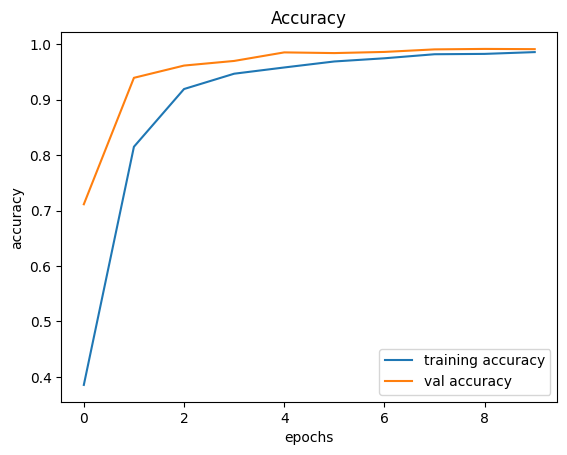

In [ ]:
plt.figure(0)
plt.plot(results_dropout.history['accuracy'], label='training accuracy')
plt.plot(results_dropout.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

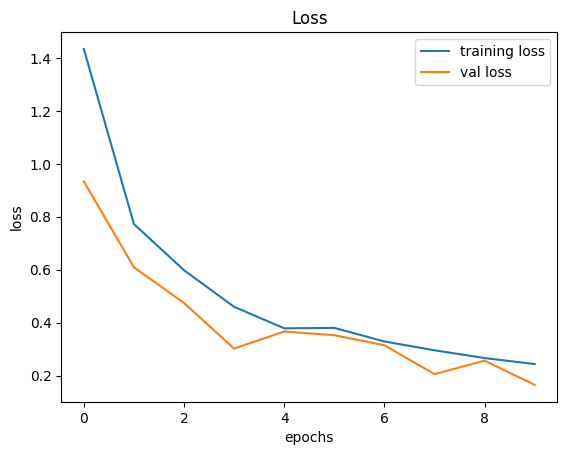

In [ ]:
plt.plot(results_dropout.history['loss'], label='training loss')
plt.plot(results_dropout.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Inference:
* The training and validation results suggest that the neural network has learned to classify the images effectively, as evidenced by the high validation accuracy and the low validation loss that closely track with the training metrics, indicating good generalization without signs of overfitting. These positive results point to a robust model that should perform well on similar unseen data, making it ready for final evaluation and potential deployment.

#### Hyperparameter Tuning - 2

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
import time

### Fill in your code here.
model =Sequential()
model.add(Dense(128, activation='tanh', input_shape=(30,30,3)))
model.add(Dropout(0.4))
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(8,activation="softmax"))

callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 30, 30, 128)       512       
                                                                 
 dropout_6 (Dropout)         (None, 30, 30, 128)       0         
                                                                 
 dense_13 (Dense)            (None, 30, 30, 64)        8256      
                                                                 
 dropout_7 (Dropout)         (None, 30, 30, 64)        0         
                                                                 
 flatten_3 (Flatten)         (None, 57600)             0         
                                                                 
 dense_14 (Dense)            (None, 8)                 460808    
                                                                 
Total params: 469576 (1.79 MB)
Trainable params: 46957

In [ ]:
results_dropout_tanh = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val),callbacks=[callback])

Epoch 1/10
300/300 [==============================] - 38s 124ms/step - loss: 1.3564 - accuracy: 0.4961 - val_loss: 0.8824 - val_accuracy: 0.7160
Epoch 2/10
300/300 [==============================] - 41s 136ms/step - loss: 0.7416 - accuracy: 0.7621 - val_loss: 0.6205 - val_accuracy: 0.7969
Epoch 3/10
300/300 [==============================] - 41s 136ms/step - loss: 0.5875 - accuracy: 0.8175 - val_loss: 0.5190 - val_accuracy: 0.8236
Epoch 4/10
300/300 [==============================] - 37s 123ms/step - loss: 0.4876 - accuracy: 0.8471 - val_loss: 0.4275 - val_accuracy: 0.8682
Epoch 5/10
300/300 [==============================] - 38s 126ms/step - loss: 0.5022 - accuracy: 0.8426 - val_loss: 0.4133 - val_accuracy: 0.8691
Epoch 6/10
300/300 [==============================] - 38s 125ms/step - loss: 0.4170 - accuracy: 0.8723 - val_loss: 0.6705 - val_accuracy: 0.8282
Epoch 7/10
300/300 [==============================] - 37s 124ms/step - loss: 0.4033 - accuracy: 0.8742 - val_loss: 0.3781 - val_ac

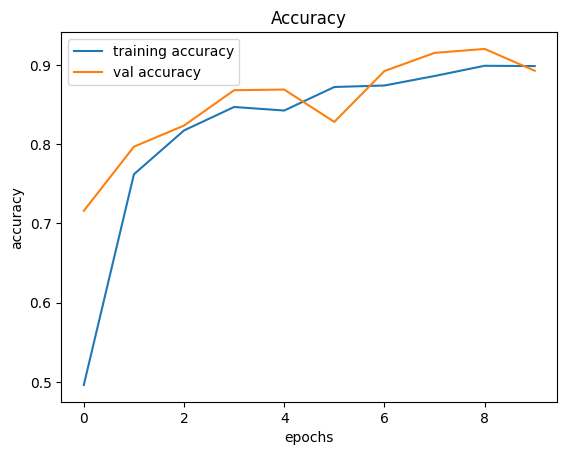

In [ ]:
plt.figure(0)
plt.plot(results_dropout_tanh.history['accuracy'], label='training accuracy')
plt.plot(results_dropout_tanh.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

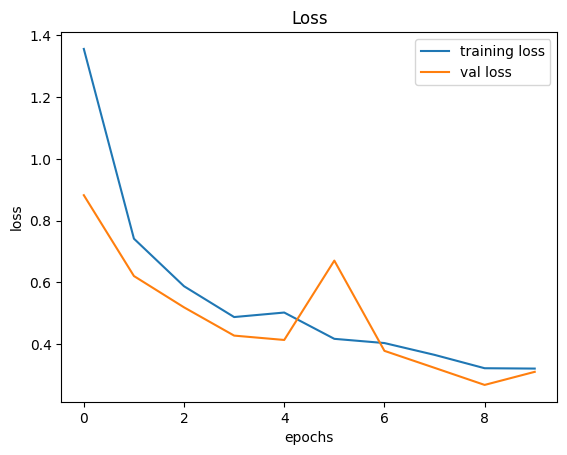

In [ ]:
plt.plot(results_dropout_tanh.history['loss'], label='training loss')
plt.plot(results_dropout_tanh.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Inference: The loss plot for your model trained with the `tanh` activation function demonstrates an overall downward trend in both training and validation loss, indicative of effective learning. However, a noticeable spike in validation loss at epoch 6 suggests a potential overfitting hiccup or an anomaly within the validation dataset. Despite this, the convergence of the training and validation loss towards the later epochs, and the fact that they finish close together, indicates a well-generalizing model. The spike warrants investigation but doesn't undermine the model's overall promising performance, as shown by the steady improvement post-spike and the absence of diverging loss curves. This model, with its current configuration and after some investigation into the loss spike, appears ready for further evaluation or deployment.

### Model 2

In [ ]:
model_2d = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(30,30,3)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(axis=-1),
    tf.keras.layers.Conv2D(filters=50, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.Conv2D(filters=50, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(axis=-1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.BatchNormalization(axis=-1),
    tf.keras.layers.Dropout(rate=0.4),
    #FInal Probability layer
    tf.keras.layers.Dense(8, activation='softmax')
])

epochs = 20

model_2d.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
model_2d.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 13, 13, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 50)        14450     
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 50)          2

In [ ]:
results_w_conv2d = model_2d.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val),callbacks=[callback])

Epoch 1/10
300/300 [==============================] - 30s 79ms/step - loss: 0.8103 - accuracy: 0.7318 - val_loss: 1.5096 - val_accuracy: 0.4575
Epoch 2/10
300/300 [==============================] - 21s 71ms/step - loss: 0.0987 - accuracy: 0.9719 - val_loss: 0.0703 - val_accuracy: 0.9812
Epoch 3/10
300/300 [==============================] - 21s 70ms/step - loss: 0.0457 - accuracy: 0.9884 - val_loss: 0.0276 - val_accuracy: 0.9933
Epoch 4/10
300/300 [==============================] - 20s 68ms/step - loss: 0.0250 - accuracy: 0.9945 - val_loss: 0.0430 - val_accuracy: 0.9871
Epoch 5/10
300/300 [==============================] - 23s 77ms/step - loss: 0.0224 - accuracy: 0.9943 - val_loss: 0.0190 - val_accuracy: 0.9929
Epoch 6/10
300/300 [==============================] - 20s 67ms/step - loss: 0.0152 - accuracy: 0.9962 - val_loss: 0.0260 - val_accuracy: 0.9921
Epoch 7/10
300/300 [==============================] - 21s 72ms/step - loss: 0.0167 - accuracy: 0.9958 - val_loss: 0.0355 - val_accuracy:

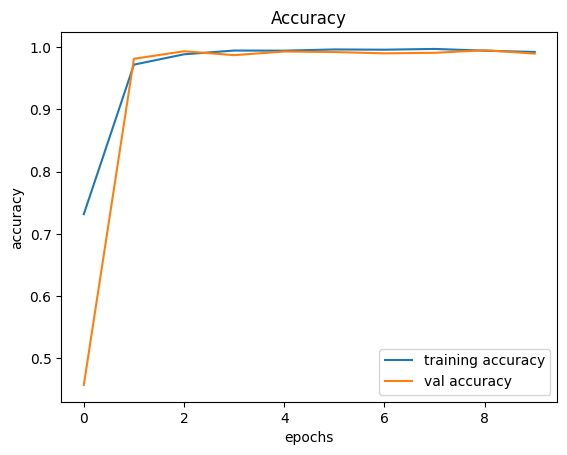

In [ ]:
plt.figure(0)
plt.plot(results_w_conv2d.history['accuracy'], label='training accuracy')
plt.plot(results_w_conv2d.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

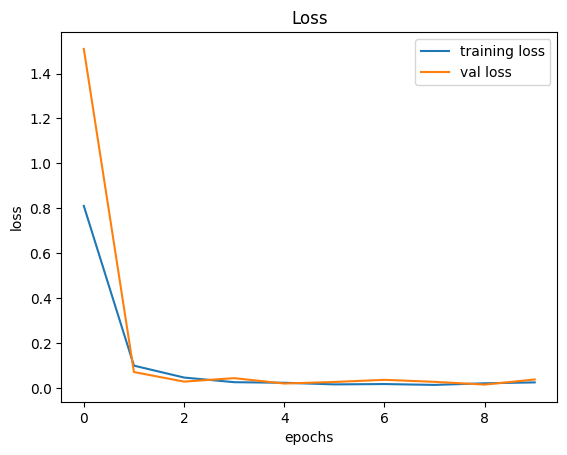

In [ ]:
plt.plot(results_w_conv2d.history['loss'], label='training loss')
plt.plot(results_w_conv2d.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Inference
* The provided training and validation loss plot, together with the previously observed accuracy trends, confirms that the convolutional neural network model has achieved an excellent fit. The model demonstrates rapid initial learning, quick stabilization of loss values, and consistent generalization performance, as evidenced by the closely aligned and low loss on both the training and validation sets across epochs. The minimal fluctuations in validation loss suggest effective regularization, and the low final loss values point to the model's strong predictive capabilities. Overall, this model appears robust and reliable for classifying images within the dataset and is likely ready for real-world deployment or further validation against an independent test set.

### Model 3 - Supervised Learning

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
num_samples, height, width, channels = X_train.shape
X_train_reshaped = X_train.reshape(num_samples, height * width * channels)

model = KNeighborsClassifier()
model.fit(X_train_reshaped, y_train)

KNeighborsClassifier()

In [ ]:
num_samples, height, width, channels = X_val.shape
X_val_reshaped = X_val.reshape(num_samples, height * width * channels)
y_pred = model.predict(X_val_reshaped)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81        39
           1       0.92      0.86      0.89       430
           2       0.93      0.85      0.89       498
           3       0.89      0.78      0.83       254
           4       0.93      0.83      0.88       428
           5       0.85      0.83      0.84       385
           6       0.99      0.94      0.96        82
           7       0.86      0.89      0.87       282

   micro avg       0.90      0.84      0.87      2398
   macro avg       0.90      0.84      0.87      2398
weighted avg       0.90      0.84      0.87      2398
 samples avg       0.84      0.84      0.84      2398



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The output from the K-Nearest Neighbors (KNN) classifier shows that it has a reasonably good performance on the validation set:

* The precision is generally high across all classes, with class 6 (presumably a particular traffic sign) achieving the highest precision at 0.99. This means that when the model predicts class 6, it is correct 99% of the time.
* The recall is somewhat lower, especially for class 0, which has the lowest recall of 0.77. This indicates that the model is missing around 23% of the actual class 0 instances.
* The F1-score, which is the harmonic mean of precision and recall, is also relatively high, although it is lower than precision for all classes. This suggests there is a trade-off being made between precision and recall during the model's predictions.
* The support shows the number of occurrences of each class in the validation set, which helps in understanding the weight of each class in the F1-score calculation.
The micro-average accuracy of 0.90 indicates the overall ratio of correctly predicted instances to the total number of instances.

The macro-average F1-score of 0.87 is an unweighted average of the F1-scores, not taking class imbalance into account.
The weighted-average F1-score of 0.87 accounts for class imbalance by weighting the F1-scores by the support of each class. It is more informative than the macro-average if there is class imbalance.


### Model 4 - Transfer Learning

A transfer learning model using TensorFlow and Keras with one of the available pre-trained models, such as `MobileNetV2`. This model is a good choice because it's powerful yet lightweight and can be used on mobile devices. It's important to match the input size of the pre-trained model, and MobileNetV2 expects images of size (224, 224, 3), but for simplicity, we'll use (96, 96, 3) which is a valid input size for MobileNetV2 and also less computationally expensive than (224, 224, 3).

In [ ]:
def resize_images(images, target_size):
    resized_images = tf.image.resize(images, target_size)
    return resized_images

target_size = (96, 96)

X_train_resized = resize_images(X_train, target_size)
X_val_resized = resize_images(X_val, target_size)

# Verify the shapes of resized images
print("X_train_resized shape:", X_train_resized.shape)
print("X_val_resized shape:", X_val_resized.shape)


X_train_resized shape: (9592, 96, 96, 3)
X_val_resized shape: (2398, 96, 96, 3)


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load MobileNetV2 base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(96, 96, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add new classification layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(8, activation='softmax')(x)  # Output layer with 8 classes

# Create the transfer learning model
model_pretrain = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_pretrain.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model_pretrain.summary()

# Verify data shapes before training
print("X_train_resized shape:", X_train_resized.shape)  # (9592, 96, 96, 3)
print("y_train_onehot shape:", y_train.shape)    # (9592, 8)
print("X_val_resized shape:", X_val_resized.shape)      # (2398, 96, 96, 3)
print("y_val_onehot shape:", y_val.shape)        # (2398, 8)


Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 96, 96, 3)]          0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 48, 48, 32)           864       ['input_8[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 48, 48, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 48, 48, 32)           0         ['bn_Conv1[0][0]']      

In [ ]:
# Train the model
epochs = 10
history = model_pretrain.fit(
    X_train_resized, y_train,
    epochs=epochs,
    validation_data=(X_val_resized, y_val)
)

Epoch 1/10
300/300 [==============================] - 81s 257ms/step - loss: 0.9288 - accuracy: 0.6761 - val_loss: 0.5494 - val_accuracy: 0.7969
Epoch 2/10
300/300 [==============================] - 79s 262ms/step - loss: 0.4306 - accuracy: 0.8495 - val_loss: 0.4409 - val_accuracy: 0.8411
Epoch 3/10
300/300 [==============================] - 66s 220ms/step - loss: 0.2987 - accuracy: 0.8944 - val_loss: 0.3659 - val_accuracy: 0.8774
Epoch 4/10
300/300 [==============================] - 67s 225ms/step - loss: 0.2198 - accuracy: 0.9216 - val_loss: 0.4258 - val_accuracy: 0.8503
Epoch 5/10
300/300 [==============================] - 75s 250ms/step - loss: 0.1691 - accuracy: 0.9413 - val_loss: 0.2863 - val_accuracy: 0.9033
Epoch 6/10
300/300 [==============================] - 73s 245ms/step - loss: 0.1432 - accuracy: 0.9510 - val_loss: 0.2789 - val_accuracy: 0.9062
Epoch 7/10
300/300 [==============================] - 65s 218ms/step - loss: 0.1186 - accuracy: 0.9589 - val_loss: 0.2846 - val_ac

The model trained using transfer learning with MobileNetV2 demonstrates robust performance, achieving a training accuracy of approximately 97.8% and a validation accuracy of around 89.9% after 10 epochs. These results indicate effective learning and generalization capabilities, with the model showcasing strong proficiency in classifying images into predefined categories. The decreasing trend in loss over epochs further signifies the model's ability to minimize errors and improve predictions. Overall, this trained model holds promise for real-world applications requiring image classification tasks, with potential for further optimization and deployment based on specific use cases.

## Testing the dataset

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
import os

def testing(testcsv, image_directory):
    y_test = pd.read_csv(testcsv)
    y_test = y_test[y_test['ClassId'].isin(range(8))]
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data = []

    for img in imgs:
        # Construct the full path to the image
        full_img_path = os.path.join(image_directory, img)

        try:
            # Open and resize the image
            image = Image.open(full_img_path)
            image = image.resize((30, 30))

            # Append the image data as numpy array to the data list
            data.append(np.array(image))
        except FileNotFoundError:
            print(f"Image file not found: {full_img_path}")

    # Convert data list to numpy array for X_test
    X_test = np.array(data)

    return X_test, label

In [ ]:
# def testing(testcsv):
#     y_test = pd.read_csv(testcsv)
#     # Filter out the rows with classes that the model hasn't seen
#     y_test = y_test[y_test['ClassId'].isin(range(8))]
#     label = y_test["ClassId"].values
#     imgs = y_test["Path"].values
#     data=[]
#     for img in imgs:
#         image = Image.open(img)
#         image = image.resize((30,30))
#         data.append(np.array(image))
#     X_test=np.array(data)
#     return X_test,label

In [ ]:
# Specify the directory containing test images
image_directory = '/content/drive/MyDrive/German Traffic Sign'

# Specify the path to the test CSV file
test_csv_path = '/content/drive/MyDrive/German Traffic Sign/Test.csv'

# Call the testing function with the test CSV file path and image directory
X_test, label = testing(test_csv_path, image_directory)

In [ ]:
# Y_pred = model_2d.predict_classes(X_test)
# Y_pred

predict_x=model_2d.predict(X_test)
classes_x=np.argmax(predict_x,axis=1)
classes_x

121/121 [==============================] - 4s 27ms/step


array([1, 7, 1, ..., 4, 2, 2])

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, classes_x))

0.7775193798449612


## Loading the Model

In [ ]:
model_2d.save(".trainings/TSR.keras")

In [ ]:
import os
os.chdir(r'/content/drive/MyDrive/German Traffic Sign')
from keras.models import load_model
model = load_model('/content/drive/MyDrive/German Traffic Sign/TSR.keras')

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30, 30))
    data.append(np.array(image))
    X_test=np.array(data)
    X_test = X_test / 255.
    Y_pred = model.predict(X_test)
    return image,Y_pred

1/1 [==============================] - 0s 49ms/step
Predicted traffic sign is:  Speed limit (80km/h)


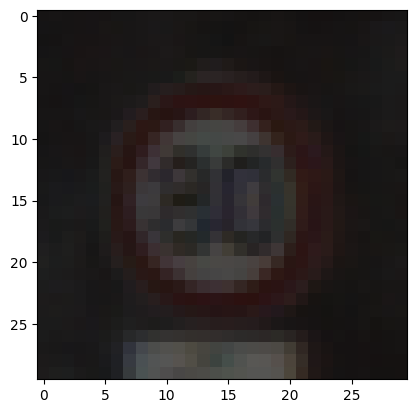

In [57]:
plot, prediction = test_on_img(r'/content/drive/MyDrive/German Traffic Sign/Test/00056.png')

predicted_class = np.argmax(prediction, axis=1)[0]
print("Predicted traffic sign is: ", classes[predicted_class])

plt.imshow(plot)
plt.show()


## Gradio

UI for image recognition

In [ ]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.0 MB/s et

In [ ]:
import gradio as gr
import tensorflow as tf
import numpy as np
from PIL import Image

# Load your trained model from Google Drive
model_path = '/TSR.keras'
model = tf.keras.models.load_model(model_path)

# Define the class names based on the model's training
classes = ['Speed limit (20km/h)',
            'Speed limit (30km/h)',
            'Speed limit (50km/h)',
            'Speed limit (60km/h)',
            'Speed limit (70km/h)',
            'Speed limit (80km/h)',
            'End of speed limit (80km/h)',
            'Speed limit (100km/h)',
            'Speed limit (120km/h)']  # Update this list with the actual class names

def classify_image(img):
    img = img.resize((30, 30))
    img_array = np.array(img) / 255.0
    img_array = img_array.reshape((1, 30, 30, 3))  # Add batch dimension
    predictions = model_2d.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    confidence = np.max(predictions)
    return f"Predicted class: {classes[predicted_class]}, Confidence: {confidence:.4f}"

# Set up the Gradio interface
iface = gr.Interface(
    fn=classify_image,
    inputs=gr.Image(),
    outputs="text",
    title="Traffic Sign Classifier",
    description="Upload a traffic sign image and the model will predict the class."
)

# Launch the Gradio app
iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://7730bc2d0671e0493a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
